<a href="https://colab.research.google.com/github/claudio1975/SDS2020/blob/master/notebooks/laboratory/4b_Lab_An_Experimental_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Experimental Exploratory Data Analysis for a Classification Task step 4**

### ***From Visualization to Statistical Analysis***

### ***From Feature Engineering to Feature Selection***

### ***From the Best Model Selection to Interpretability***



To start the exploration set up the environment with libraries, upload the data set (it's stored in a github repository) and split it into target variable and features variables. No more set up is required using Google Colab. Look at the guidelines: https://colab.research.google.com/notebooks/welcome.ipynb

#### **Contents**

The goal of this challenge, launched by CrowdAnalytix, is to develop a model to predict whether a mortgage will be funded or not based on certain factors in a customer’s application data. 
The evaluation metric used is the F1 score.
The data set is made up by 45.642 observations with predictor variables (21 features) and the target variable. It's a classification task with the goal to predict the 'Result' target variable for every row (Funded, Not Funded). Look at the competition: https://www.crowdanalytix.com/contests/propensity-to-fund-mortgages


### **Exploratory Data Analysis (EDA) Pipeline**

![](http://www.theleader.info/wp-content/uploads/2017/07/Mortgage-rates.jpg)

# Prepare Workspace

#####- Upload libraries

In [1]:
# Upload libraries

# to handle data set
import pandas as pd
import numpy as np

# to plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# statistics
import statistics
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis 
from scipy.stats import skew
from statistics import stdev 

# to split data set 
from sklearn.model_selection import train_test_split

# standardization
from sklearn.preprocessing import StandardScaler

# to build models
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# to evaluate models
from sklearn.metrics import f1_score

# to handle imbalanced data set
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# feature engineering
!pip install feature-engine
import feature_engine
from sklearn.preprocessing import KBinsDiscretizer

# feature importance
from sklearn.tree import DecisionTreeClassifier
!pip install eli5 
import eli5
from eli5.sklearn import PermutationImportance
!pip install shap
import shap
import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 8.7MB 5.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 112kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394126 sha256=ce6ac3712986c811088a64df23a99f8964dfa40eb7c29fcfc647866faa8d0656
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


#####- Upload data set

In [0]:
# Upload dataset
url = 'https://raw.githubusercontent.com/claudio1975/SDS2020/master/data/CAX_train_small.csv'
df = pd.read_csv(url)

#####- Split data set

In [0]:
# Split data set between target and features
X_full = df
y = X_full.RESULT
X_full = X_full.drop(['RESULT'], axis=1)


# Summarize Data

In [4]:
# Look at dimension of data set and types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4564 entries, 0 to 4563
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unique_ID          4564 non-null   object 
 1   MORTGAGE NUMBER    4564 non-null   int64  
 2   PROPERTY VALUE     4564 non-null   int64  
 3   MORTGAGE PAYMENT   4564 non-null   int64  
 4   GDS                4564 non-null   float64
 5   LTV                4564 non-null   float64
 6   TDS                4564 non-null   float64
 7   AMORTIZATION       4564 non-null   int64  
 8   MORTGAGE AMOUNT    4564 non-null   float64
 9   RATE               4564 non-null   float64
 10  MORTGAGE PURPOSE   4564 non-null   object 
 11  PAYMENT FREQUENCY  4564 non-null   object 
 12  PROPERTY TYPE      4564 non-null   object 
 13  TERM               4564 non-null   int64  
 14  FSA                4564 non-null   object 
 15  AGE RANGE          4564 non-null   object 
 16  GENDER             4564 

In [5]:
# Summarize attribute distributions of the data frame
df.describe(include='all')

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
count,4564,4564.000000,4.564000e+03,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4.564000e+03,4564.000000,4564,4564,4564,4564.000000,4564,4564,4564,4.564000e+03,4564.000000,4564,4564.000000,4564
unique,4564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,8,NaN,753,11,3,NaN,NaN,19,NaN,2
top,CAX_Train_31543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Purchase,Monthly,Single Detached,NaN,L7A,45-49,Male,NaN,NaN,56,NaN,FUNDED
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2452,4276,2893,NaN,90,762,2419,NaN,NaN,1085,NaN,3531
mean,NaN,22771.992989,5.768256e+05,2352.064636,28.357263,70.482048,39.624248,354.991236,4.188461e+05,4.661700,NaN,NaN,NaN,15.240578,NaN,NaN,NaN,1.228709e+05,5.379492,NaN,664.525855,NaN
std,NaN,13057.493643,4.275116e+05,1582.423513,24.532723,11.743831,53.837568,18.401491,2.864676e+05,0.652637,NaN,NaN,NaN,7.372673,NaN,NaN,NaN,1.006197e+05,3.301316,NaN,128.579907,NaN
min,NaN,8.000000,6.000000e+04,205.000000,-27.190000,8.080000,-5.870000,120.000000,3.280000e+04,3.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000e+03,-1.000000,NaN,0.000000,NaN
25%,NaN,11606.750000,3.367500e+05,1400.000000,19.507500,65.000000,32.847500,360.000000,2.435471e+05,4.250000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,6.900000e+04,2.000000,NaN,624.000000,NaN
50%,NaN,22758.500000,4.700000e+05,2009.000000,29.250000,75.000000,38.255000,360.000000,3.500000e+05,4.500000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,9.800000e+04,7.000000,NaN,678.000000,NaN
75%,NaN,33747.500000,6.800000e+05,2822.000000,35.992500,80.000000,42.260000,360.000000,5.056788e+05,5.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.450000e+05,8.000000,NaN,736.000000,NaN


In [6]:
# Take a peek at the first rows of the data
df.head(10)

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_25108,25108,148000,768,31.95,65.00,56.78,360,130000.0,4.50,Refinance,Monthly,Townhouse Freehold,24,N2E,40-44,Female,39000,2,56,784,FUNDED
1,CAX_Train_35282,35282,580000,2819,5.37,75.36,37.74,360,520000.0,4.50,Refinance,Monthly,Semi-Detached,24,M3A,50-54,Female,176000,2,54,717,FUNDED
2,CAX_Train_15462,15462,450000,2891,28.53,64.35,28.53,360,575000.0,5.00,Refinance,Monthly,Single Detached,12,L3S,70 and over,Male,130000,8,72,0,FUNDED
3,CAX_Train_12736,12736,850000,3993,27.17,80.00,30.00,360,680000.0,5.00,Purchase,Monthly,Single Detached,12,L3Y,25-29,Male,505000,8,23,743,FUNDED
4,CAX_Train_29414,29414,360000,1900,26.60,66.67,26.76,240,240000.0,5.00,Refinance,Monthly,Single Detached,36,L1T,35-39,Female,93000,2,54,618,FUNDED
5,CAX_Train_43449,43449,520000,2278,19.03,80.00,33.80,360,416000.0,3.50,Purchase,Monthly,Single Detached,24,L9G,25-29,Male,150000,8,11,725,FUNDED
6,CAX_Train_39696,39696,400000,1920,15.15,80.00,42.06,360,320000.0,4.00,Purchase,Monthly,Single Detached,12,L4N,35-39,Male,164000,8,54,685,NOT FUNDED
7,CAX_Train_8382,8382,424000,1559,8.75,65.00,56.59,360,318210.9,4.25,Purchase,Monthly,High Rise,12,L6G,55-59,Female,71000,2,56,678,NOT FUNDED
8,CAX_Train_15987,15987,940000,3970,27.70,75.01,40.24,360,705000.0,4.00,Purchase,Monthly,Single Detached,12,L6P,40-44,Female,185000,8,56,649,FUNDED
9,CAX_Train_16131,16131,563000,2263,16.42,48.81,38.45,360,275000.0,6.00,Purchase,Monthly,Single Detached,12,L7A,40-44,Female,63000,3,56,691,FUNDED


Explanatory variables are grouped into categorical variables and numerical variables and for each one let's do a graphical and non-graphical analysis, but before this split let's run some some data preparation activities.

# Formatting Features

If necessary, it's a good practice to format data, after have taken a peek of it. Missing values on numeric features are marked by "-1", meanwhile for categorical features they are marked with "Unknown"; let's imput these values with "NA".  

In [0]:
# Replaced both '-1' and 'Unknown' values with NA's
X_full[X_full== -1] = np.nan
X_full[X_full=="Unknown"] = np.nan

In [0]:
# Format data into float and object types and split mixed variables
X_full['PROPERTY VALUE'] = X_full['PROPERTY VALUE'].astype(float)
X_full['MORTGAGE PAYMENT'] = X_full['MORTGAGE PAYMENT'].astype(float)
X_full['AMORTIZATION'] = X_full['AMORTIZATION'].astype(float)
X_full['TERM'] = X_full['TERM'].astype(float)
X_full['INCOME'] = X_full['INCOME'].astype(float)
X_full['INCOME TYPE'] = X_full['INCOME TYPE'].astype(object)
X_full['CREDIT SCORE'] = X_full['CREDIT SCORE'].astype(float)
X_full['FSA_num'] = X_full['FSA'].str.extract('(\d+)') # extract numerical part
X_full['FSA_let'] = X_full['FSA'].str[0] # extract the first letter

In [0]:
# Rename some features for a practical use
X_full = X_full.rename(columns={"MORTGAGE PURPOSE":"MORTGAGE_PURPOSE","PAYMENT FREQUENCY":"PAYMENT_FREQUENCY","PROPERTY TYPE":"PROPERTY_TYPE","AGE RANGE":"AGE_RANGE","PROPERTY VALUE": "PROPERTY_VALUE",
                                "MORTGAGE PAYMENT": "MORTGAGE_PAYMENT", "MORTGAGE AMOUNT":"MORTGAGE_AMOUNT","INCOME TYPE":"INCOME_TYPE","CREDIT SCORE":"CREDIT_SCORE"})

# Handling Missing Values



There are two categorical features with missing values lower than 40%. The approach followed: fill up missing values with the last observation carried forward (LOCF) and for both of them let's creat a boolean feature with 1 (true-missing value) or 0 (false-actual value).

In [10]:
# Check missing values both to numeric features and categorical features
X_full.isnull().sum()/X_full.shape[0]*100

Unique_ID             0.000000
MORTGAGE NUMBER       0.000000
PROPERTY_VALUE        0.000000
MORTGAGE_PAYMENT      0.000000
GDS                   0.000000
LTV                   0.000000
TDS                   0.000000
AMORTIZATION          0.000000
MORTGAGE_AMOUNT       0.000000
RATE                  0.000000
MORTGAGE_PURPOSE      0.000000
PAYMENT_FREQUENCY     0.000000
PROPERTY_TYPE         0.000000
TERM                  0.000000
FSA                   0.000000
AGE_RANGE             0.000000
GENDER               13.978966
INCOME                0.000000
INCOME_TYPE           0.438212
NAICS CODE            0.000000
CREDIT_SCORE          0.000000
FSA_num               0.000000
FSA_let               0.000000
dtype: float64

In [0]:
# Attaching boolean feature for each variable with missing values
X_full['GENDER_'] = np.where(X_full['GENDER'].isnull(), 1, 0)
X_full['GENDER_'] = X_full['GENDER_'].astype(object)
X_full['INCOME_TYPE_'] = np.where(X_full['INCOME_TYPE'].isnull(), 1, 0)
X_full['INCOME_TYPE_'] = X_full['INCOME_TYPE_'].astype(object)

In [0]:
# Input missing values with the last observation carried forward (LOCF)
X_full['GENDER'].fillna(method='ffill', inplace=True)
X_full['GENDER'] = X_full['GENDER'].astype(object)
X_full['INCOME_TYPE'].fillna(method='ffill', inplace=True)
X_full['INCOME_TYPE'] = X_full['INCOME_TYPE'].astype(object)

In [13]:
# final check
X_full.isnull().sum()/X_full.shape[0]*100

Unique_ID            0.0
MORTGAGE NUMBER      0.0
PROPERTY_VALUE       0.0
MORTGAGE_PAYMENT     0.0
GDS                  0.0
LTV                  0.0
TDS                  0.0
AMORTIZATION         0.0
MORTGAGE_AMOUNT      0.0
RATE                 0.0
MORTGAGE_PURPOSE     0.0
PAYMENT_FREQUENCY    0.0
PROPERTY_TYPE        0.0
TERM                 0.0
FSA                  0.0
AGE_RANGE            0.0
GENDER               0.0
INCOME               0.0
INCOME_TYPE          0.0
NAICS CODE           0.0
CREDIT_SCORE         0.0
FSA_num              0.0
FSA_let              0.0
GENDER_              0.0
INCOME_TYPE_         0.0
dtype: float64

# Target Variable Analysis

The target variable is grouped into two classes: "Funded" and "Not Funded". Looking at the barplot, it's quite imbalanced.

In [14]:
# Summarize the class distribution 
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
RESULT,,
FUNDED,3531,0.773663
NOT FUNDED,1033,0.226337


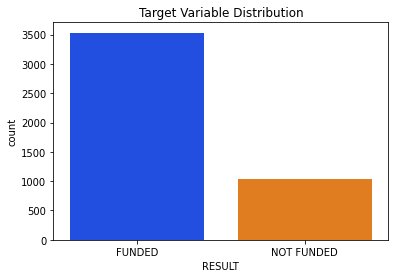

In [15]:
# Plot the target variable
ax = sns.countplot(x=y, data=X_full, palette='bright', order=["FUNDED", "NOT FUNDED"]).set_title("Target Variable Distribution")

# Categorical Features Analysis

#####- Analysis for categorical features (barplot, univariate analysis, bivariate analysis)

Let's group all categorical features into a new subset: let's run a graphical analysis using barplots and count the frequency for each class. For a bivariate analysis it's been used a Chi-Square Test to evaluate the relationship between the target variable and each categorical feature. 

In [16]:
# let's have a look at how many labels for categorical features
for col in X_full.columns:
  if X_full[col].dtype =="object":
    print(col, ': ', len(X_full[col].unique()), ' labels')

Unique_ID :  4564  labels
MORTGAGE_PURPOSE :  2  labels
PAYMENT_FREQUENCY :  3  labels
PROPERTY_TYPE :  8  labels
FSA :  753  labels
AGE_RANGE :  11  labels
GENDER :  2  labels
INCOME_TYPE :  16  labels
NAICS CODE :  19  labels
FSA_num :  10  labels
FSA_let :  16  labels
GENDER_ :  2  labels
INCOME_TYPE_ :  2  labels


In [0]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() <= 15 and 
                    X_full[cname].dtype == "object"]

In [18]:
# Subset with categorical features
cat = X_full[categorical_cols]
cat.columns


Index(['MORTGAGE_PURPOSE', 'PAYMENT_FREQUENCY', 'PROPERTY_TYPE', 'AGE_RANGE',
       'GENDER', 'FSA_num', 'GENDER_', 'INCOME_TYPE_'],
      dtype='object')

In [19]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4564 entries, 0 to 4563
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MORTGAGE_PURPOSE   4564 non-null   object
 1   PAYMENT_FREQUENCY  4564 non-null   object
 2   PROPERTY_TYPE      4564 non-null   object
 3   AGE_RANGE          4564 non-null   object
 4   GENDER             4564 non-null   object
 5   FSA_num            4564 non-null   object
 6   GENDER_            4564 non-null   object
 7   INCOME_TYPE_       4564 non-null   object
dtypes: object(8)
memory usage: 285.4+ KB


col_0             count  frequency
MORTGAGE_PURPOSE                  
Purchase           2452   0.537248
Refinance          2112   0.462752


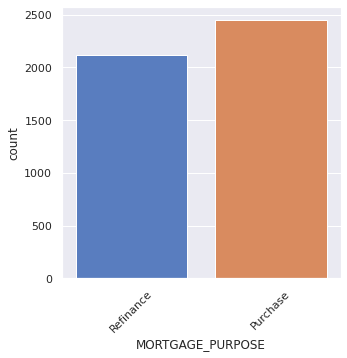

col_0                  count  frequency
PAYMENT_FREQUENCY                      
Bi-Weekly                170   0.037248
Bi-Weekly Accelerated    118   0.025855
Monthly                 4276   0.936897


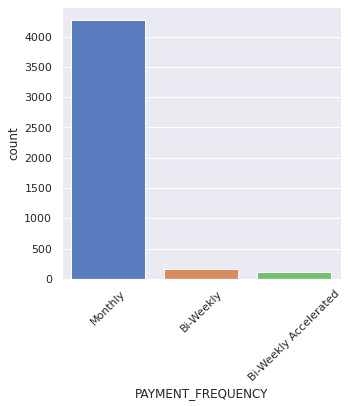

col_0                  count  frequency
PROPERTY_TYPE                          
Duplex                    39   0.008545
Fourplex                  10   0.002191
High Rise                622   0.136284
Semi-Detached            415   0.090929
Single Detached         2893   0.633874
Townhouse Condominium    264   0.057844
Townhouse Freehold       304   0.066608
Triplex                   17   0.003725


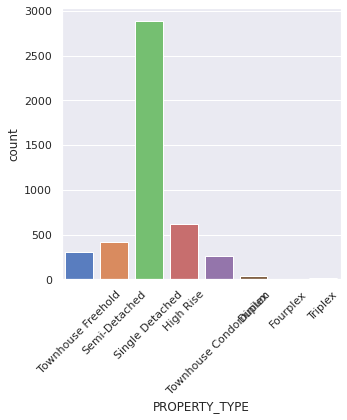

col_0        count  frequency
AGE_RANGE                    
25-29          265   0.058063
30-34          410   0.089833
35-39          564   0.123576
40-44          732   0.160386
45-49          762   0.166959
50-54          661   0.144829
55-59          478   0.104733
60-64          272   0.059597
65-69          183   0.040096
70 and over    147   0.032209
Under 25        90   0.019720


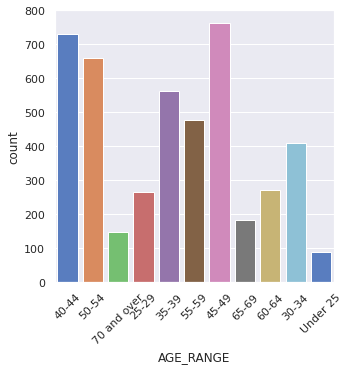

col_0   count  frequency
GENDER                  
Female   1738   0.380806
Male     2826   0.619194


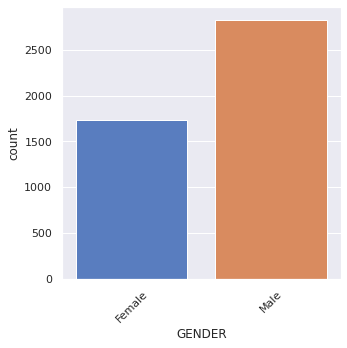

col_0    count  frequency
FSA_num                  
0          219   0.047984
1          812   0.177914
2          416   0.091148
3          450   0.098598
4          642   0.140666
5          434   0.095092
6          773   0.169369
7          301   0.065951
8          171   0.037467
9          346   0.075811


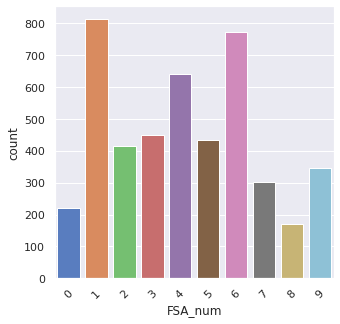

In [20]:
# Univariate analysis with frequency and barplots
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER','FSA_num']

for col in fcat:
    count = pd.crosstab(index = cat[col], columns="count")
    percentage = pd.crosstab(index = cat[col], columns="frequency")/pd.crosstab(index = cat[col], columns="frequency").sum()
    tab = pd.concat([count, percentage], axis=1)
    plt.figure()
    sns.countplot(x=cat[col], data=cat, palette="muted")
    plt.xticks(rotation=45)
    print(tab)
    plt.show()

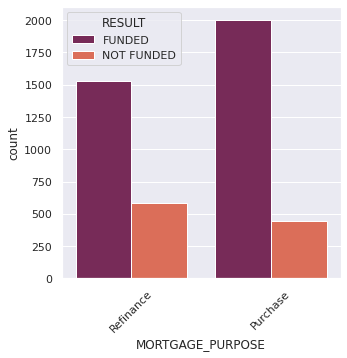

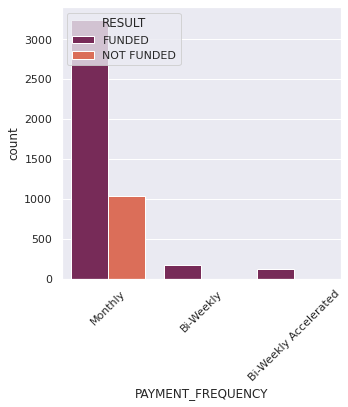

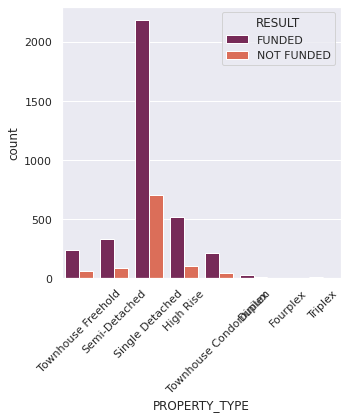

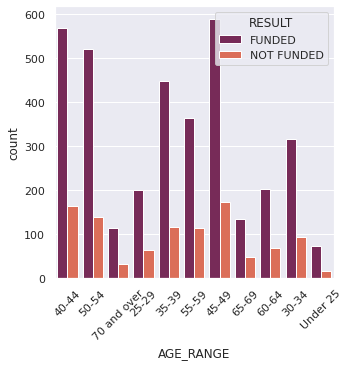

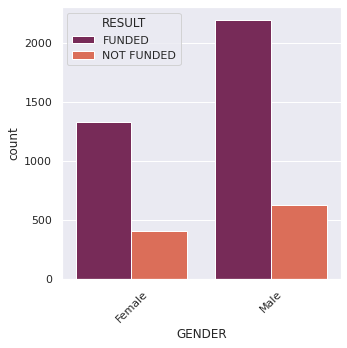

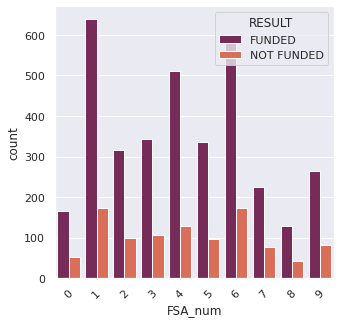

In [21]:
# Bivariate analysis with barplots
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER','FSA_num']

for col in fcat:
    plt.figure()
    sns.countplot(x=cat[col], hue=y, data=cat, palette="rocket")
    plt.xticks(rotation=45)
    plt.show()

#####- Feature Selection

The Chi-Square Test is used as feature selection testing the independence between target variable and categorical features.

In [0]:
# Joined target variable with categorical features in a new data frame for a Chi-Square Test
cat2 = pd.concat([y,cat], axis=1)
testColumns = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER','GENDER_','INCOME_TYPE_','FSA_num']

In [23]:
alpha = 0.05
for var in testColumns:
    X = cat2[var].astype(str)
    Y = cat2['RESULT'].astype(str)
    dfObserved = pd.crosstab(Y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    if p <= alpha:
    	print('{0} Dependent (reject H0)'.format(var))
    else:
       print('{0} Independent (fail to reject H0)'.format(var))

MORTGAGE_PURPOSE Dependent (reject H0)
PAYMENT_FREQUENCY Dependent (reject H0)
PROPERTY_TYPE Dependent (reject H0)
AGE_RANGE Independent (fail to reject H0)
GENDER Independent (fail to reject H0)
GENDER_ Independent (fail to reject H0)
INCOME_TYPE_ Independent (fail to reject H0)
FSA_num Independent (fail to reject H0)


In [24]:
# Drop features not helpful by Feature Selection
cat = cat.drop(['GENDER', 'GENDER_','AGE_RANGE','INCOME_TYPE_','FSA_num'], axis=1)
cat.shape

(4564, 3)

#####- Feature Engineering on categorical features: label encoding

Let's transform categorical features into numerical variables with label encoding methodology to afford a better understanding of variables by machine learning models.

In [0]:
from sklearn.preprocessing import LabelEncoder
for col in cat.columns:
  cat[col] = cat[col].astype(str)
# Make copy to avoid changing original data 
label_cat = cat.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in label_cat.columns:
    label_cat[col] = label_encoder.fit_transform(label_cat[col])


In [26]:
# Look at the new subset
label_cat.shape

(4564, 3)

In [27]:
label_cat.head()

,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,PROPERTY_TYPE
0,1,2,6
1,1,2,3
2,1,2,4
3,0,2,4
4,1,2,4


# Numerical Features Analysis

#####- Analysis for numerical features (distribution, univariate analysis, bivariate analysis)

In [0]:
# Select numerical columns
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['float64']]

In [29]:
# Subset with numerical features
num = X_full[numerical_cols]
num.columns

Index(['PROPERTY_VALUE', 'MORTGAGE_PAYMENT', 'GDS', 'LTV', 'TDS',
       'AMORTIZATION', 'MORTGAGE_AMOUNT', 'RATE', 'TERM', 'INCOME',
       'CREDIT_SCORE'],
      dtype='object')

In [30]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4564 entries, 0 to 4563
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PROPERTY_VALUE    4564 non-null   float64
 1   MORTGAGE_PAYMENT  4564 non-null   float64
 2   GDS               4564 non-null   float64
 3   LTV               4564 non-null   float64
 4   TDS               4564 non-null   float64
 5   AMORTIZATION      4564 non-null   float64
 6   MORTGAGE_AMOUNT   4564 non-null   float64
 7   RATE              4564 non-null   float64
 8   TERM              4564 non-null   float64
 9   INCOME            4564 non-null   float64
 10  CREDIT_SCORE      4564 non-null   float64
dtypes: float64(11)
memory usage: 392.3 KB


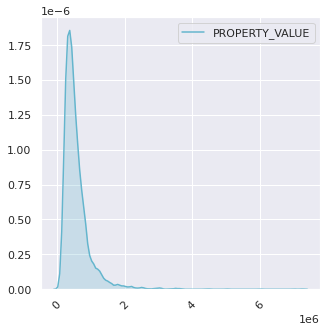

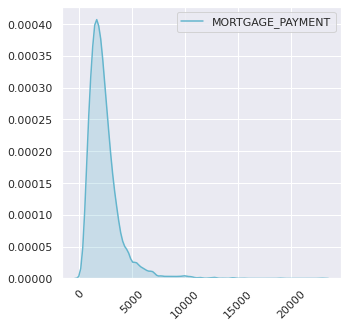

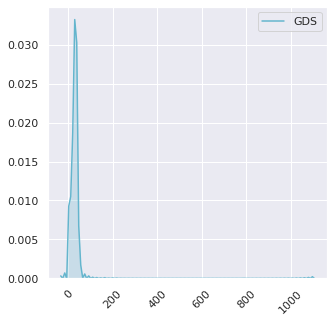

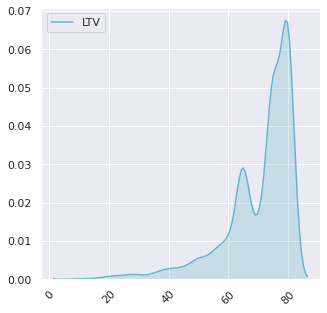

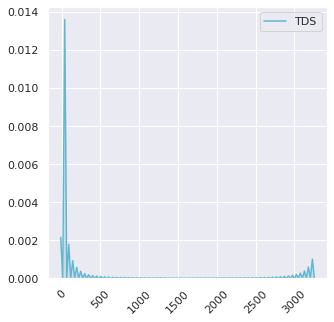

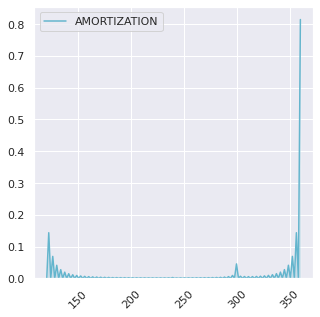

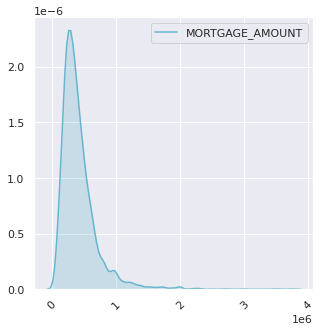

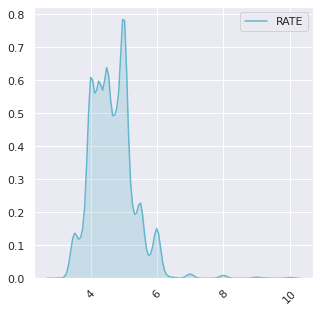

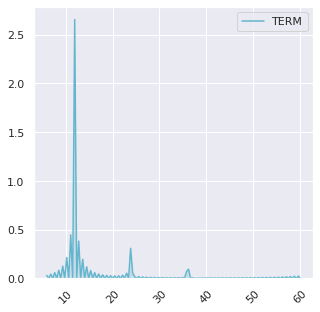

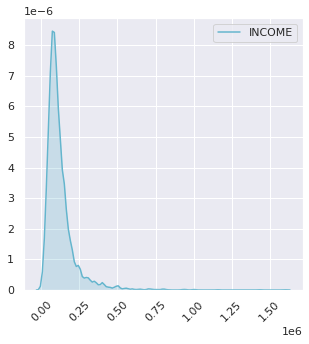

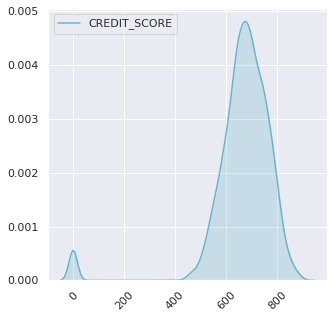

In [31]:
# Univariate analysis with density plots and histograms
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['PROPERTY_VALUE', 'MORTGAGE_PAYMENT','GDS', 'LTV', 'TDS', 'AMORTIZATION','MORTGAGE_AMOUNT', 'RATE', 'TERM', 'INCOME', 'CREDIT_SCORE']

for col in fnum:
    plt.figure()
    x=num[col]
    sns.kdeplot(x, shade=True, color='c')
    plt.xticks(rotation=45)
    plt.show() 

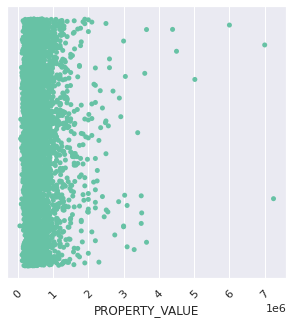

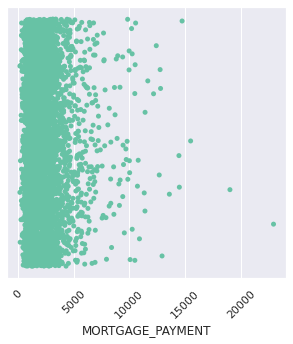

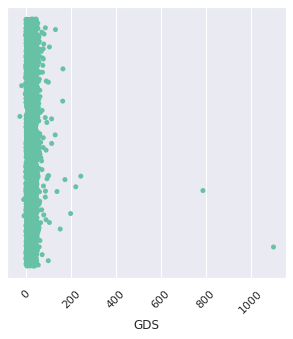

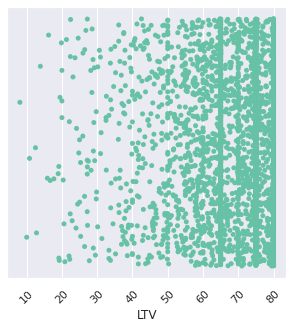

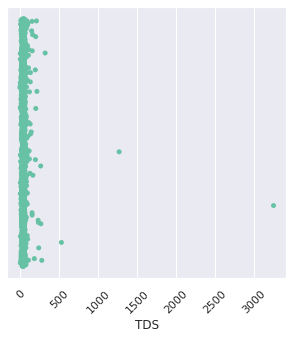

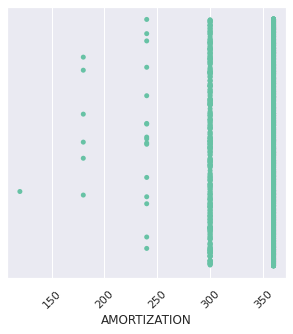

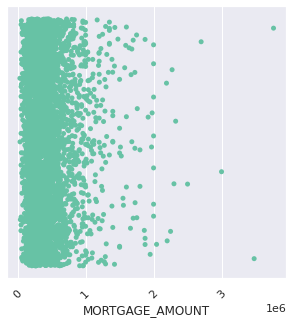

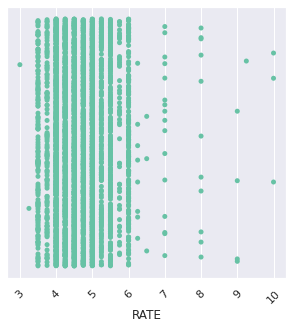

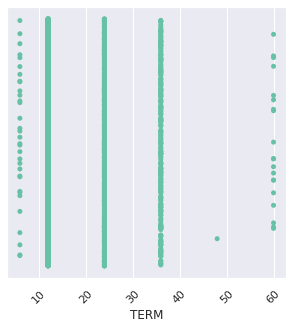

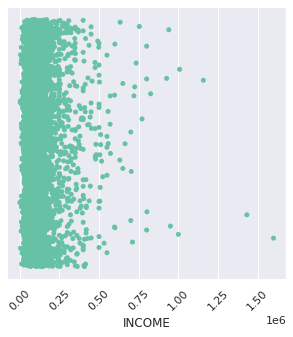

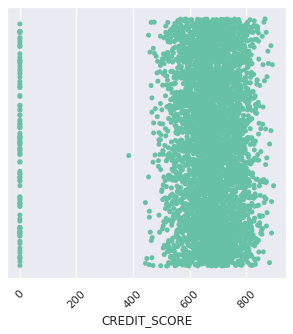

In [32]:
# Univariate analysis with box-plots
for col in fnum:
    plt.figure()
    x=num[col]
    sns.stripplot(x,palette="BuGn_r",jitter=True)
    plt.xticks(rotation=45)
    plt.show()

In [33]:
# Univariate analysis looking at Standard Deviation, Skewness and Kurtosis
for col in fnum:
  print(col,'\nStandard Deviation :', stdev(num[col]), 
        '\nSkewness :', skew(num[col]), 
        '\nKurtosis :', kurtosis(num[col]))

PROPERTY_VALUE 
Standard Deviation : 427511.64356636326 
Skewness : 4.623303471797591 
Kurtosis : 42.48934852870376
MORTGAGE_PAYMENT 
Standard Deviation : 1582.4235127029624 
Skewness : 3.1649107806341514 
Kurtosis : 19.01743723695456
GDS 
Standard Deviation : 24.53272261088206 
Skewness : 25.288402414472905 
Kurtosis : 999.2429508068795
LTV 
Standard Deviation : 11.743831105116783 
Skewness : -1.8176062508082156 
Kurtosis : 3.7582831494046864
TDS 
Standard Deviation : 53.83756769216233 
Skewness : 49.6004079091762 
Kurtosis : 2844.3605238512955
AMORTIZATION 
Standard Deviation : 18.401490958030667 
Skewness : -4.337306225790891 
Kurtosis : 24.655701775995013
MORTGAGE_AMOUNT 
Standard Deviation : 286467.5943761927 
Skewness : 2.969180997538325 
Kurtosis : 16.309255636188006
RATE 
Standard Deviation : 0.6526367574887584 
Skewness : 1.3302023890973864 
Kurtosis : 6.188566529769449
TERM 
Standard Deviation : 7.372673227090708 
Skewness : 2.4946064169167355 
Kurtosis : 7.159408672577195
IN

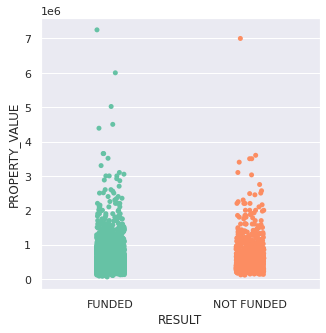

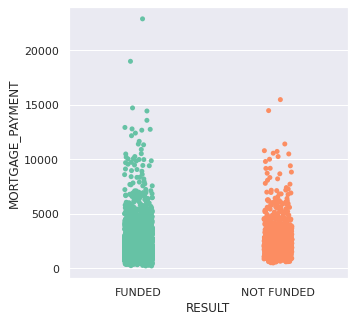

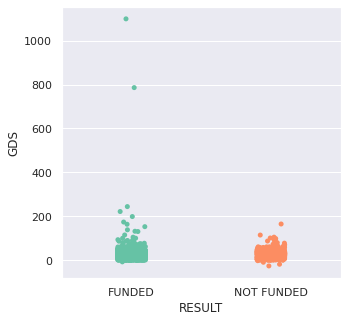

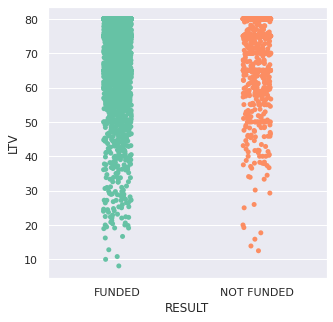

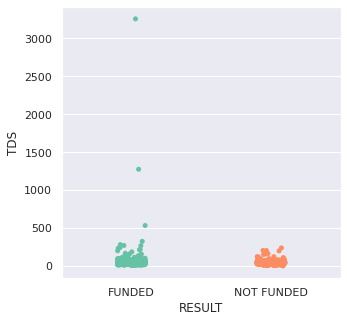

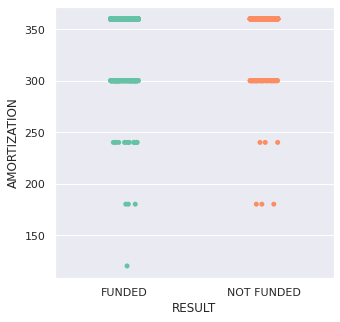

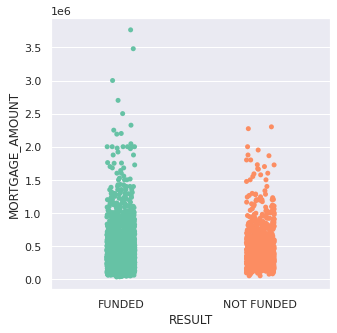

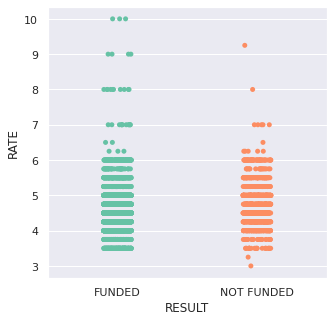

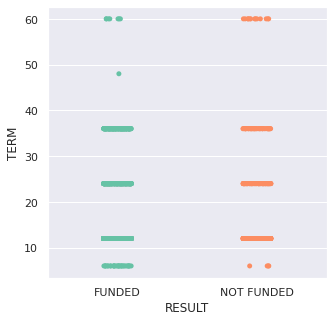

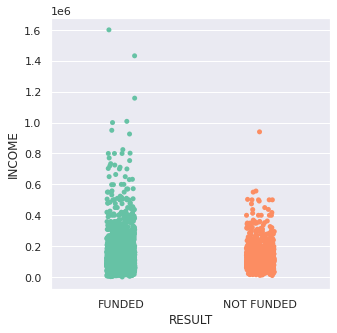

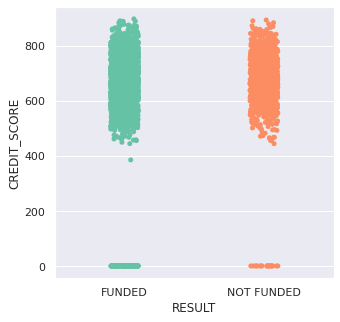

In [34]:
# Bivariate analysis with box-plots
for col in fnum:
    plt.figure()
    sns.stripplot(y=col, x=y, data=num, jitter=True, palette="Set2")
    plt.show()

####- Feature Selection

The Kendall's Test is used as feature selection testing the importance of the predictor variables.

In [0]:
# Merging numerical covariates with dependent variable
num2 = pd.concat([y,num], axis=1)
num2['RESULT'] = np.where(num2['RESULT']=='FUNDED',1,0)

In [36]:
# Kendall's Test
alpha = 0.05
for var in fnum:
  p = stats.kendalltau(num2['RESULT'],num2[var])[1]
  if p <= alpha:
    	print('{0} Correlated (reject H0)'.format(var))
  else:
       print('{0} Uncorrelated (fail to reject H0)'.format(var))

PROPERTY_VALUE Correlated (reject H0)
MORTGAGE_PAYMENT Correlated (reject H0)
GDS Correlated (reject H0)
LTV Correlated (reject H0)
TDS Correlated (reject H0)
AMORTIZATION Correlated (reject H0)
MORTGAGE_AMOUNT Correlated (reject H0)
RATE Correlated (reject H0)
TERM Uncorrelated (fail to reject H0)
INCOME Correlated (reject H0)
CREDIT_SCORE Uncorrelated (fail to reject H0)


In [37]:
# Drop features not helpful by Feature Selection
num = num.drop(['TERM','CREDIT_SCORE'], axis=1)
num.shape

(4564, 9)

####- Handling Outliers

An outlier is an observation that is unlike the other observations. They are extreme values that fall far away of the other observations. There are several ways to handle outliers, the approach followed is to cap them replacing those observations outside the quantiles with the values of the 5th quantile and 95th quantile.

In [0]:
def outliers_plot(dataframe, feature):
    plt.figure(figsize=(15, 5))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(dataframe[feature], bins=30, color='g')
    plt.title('Histogram')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(dataframe[feature], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    # boxplot
    plt.subplot(1, 3, 3)
    x=dataframe[feature]
    sns.boxplot(x,linewidth=1.5, color='g')
    plt.title('Boxplot')

    plt.show()

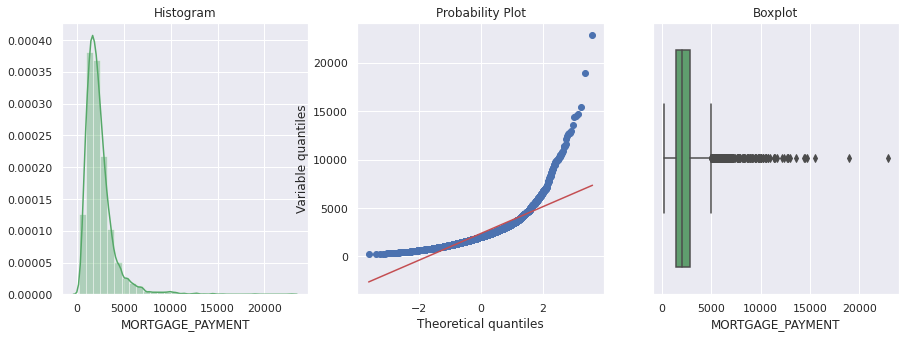

In [39]:
# MORTGAGE_PAYMENT
# before
outliers_plot(num, 'MORTGAGE_PAYMENT')

In [0]:
# correction
i = 'MORTGAGE_PAYMENT'
q95, q05 = np.percentile(num[i].dropna(), [95 ,5])
min = q05
max = q95  
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

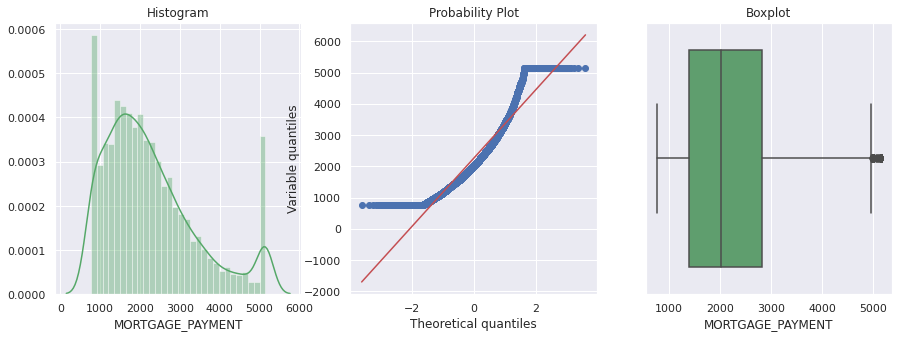

In [41]:
# MORTGAGE_PAYMENT
# after
outliers_plot(num, 'MORTGAGE_PAYMENT')

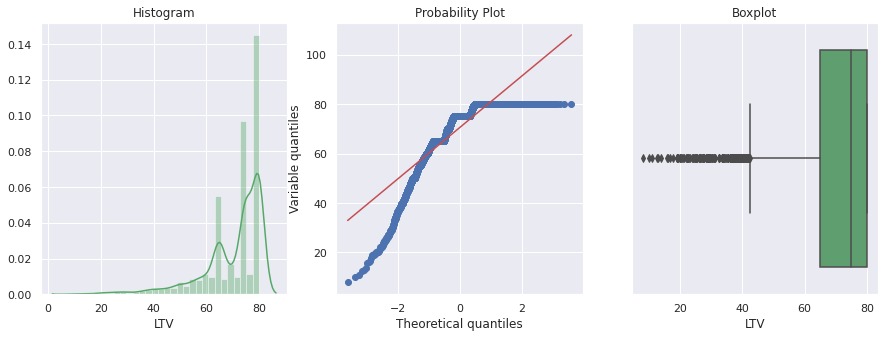

In [42]:
# LTV
# before
outliers_plot(num, 'LTV')

In [0]:
# correction
i = 'LTV'
q95, q05 = np.percentile(num[i].dropna(), [95 ,5])
min = q05
max = q95  
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

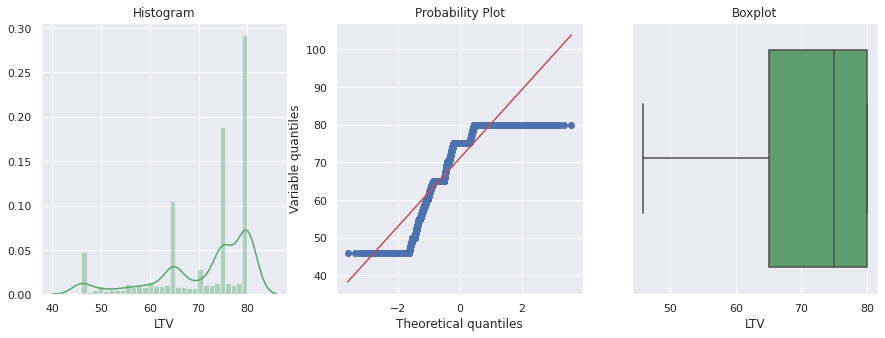

In [44]:
# after
outliers_plot(num, 'LTV')

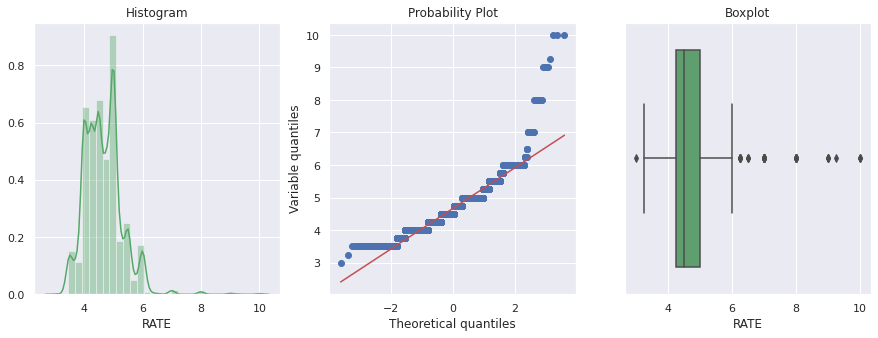

In [45]:
# RATE
# before
outliers_plot(num, 'RATE')

In [0]:
# correction
i = 'RATE'
q95, q05 = np.percentile(num[i].dropna(), [95 ,5])
min = q05
max = q95  
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

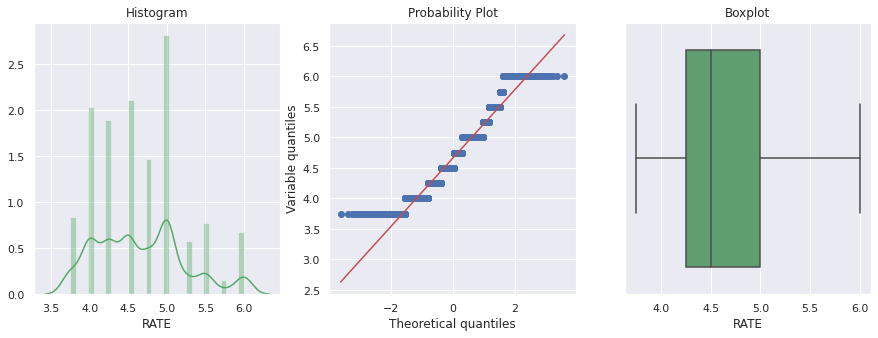

In [47]:
# after
outliers_plot(num, 'RATE')

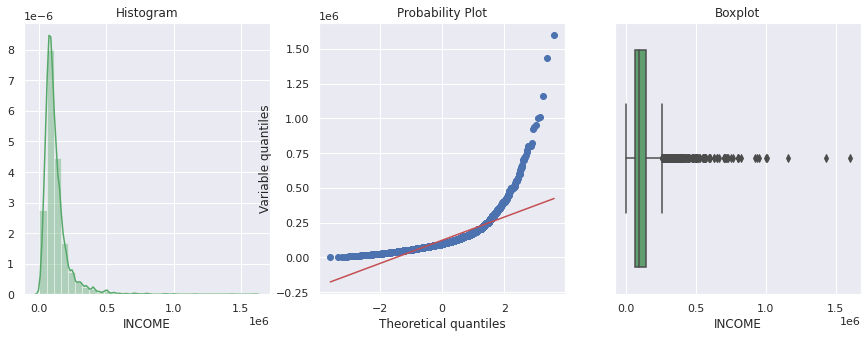

In [48]:
# INCOME
# before
outliers_plot(num, 'INCOME')

In [0]:
# correction
i = 'INCOME'
q95, q05 = np.percentile(num[i].dropna(), [95 ,5])
min = q05
max = q95  
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

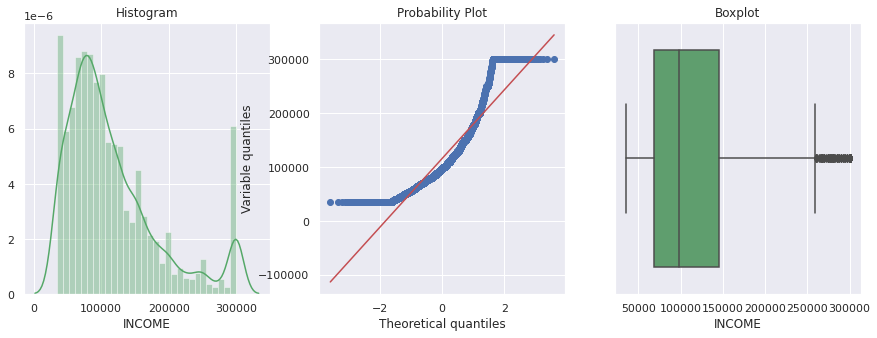

In [50]:
# after
outliers_plot(num, 'INCOME')

# Feature Selection on all data set

Another feature selection approach is to observe correlation between variables, let's apply it on all data set. There are some models such as linear regression where related features can deteriorate the performance (multicollinearity). Though some ensemble models are not sensitive at this topic, “Ensembles of tree-based models”, the approach followed is to remove them anyway because we don't know which model to use in advance.

In [0]:
# Grasp all
X_all = pd.concat([label_cat, num], axis=1, join='inner')

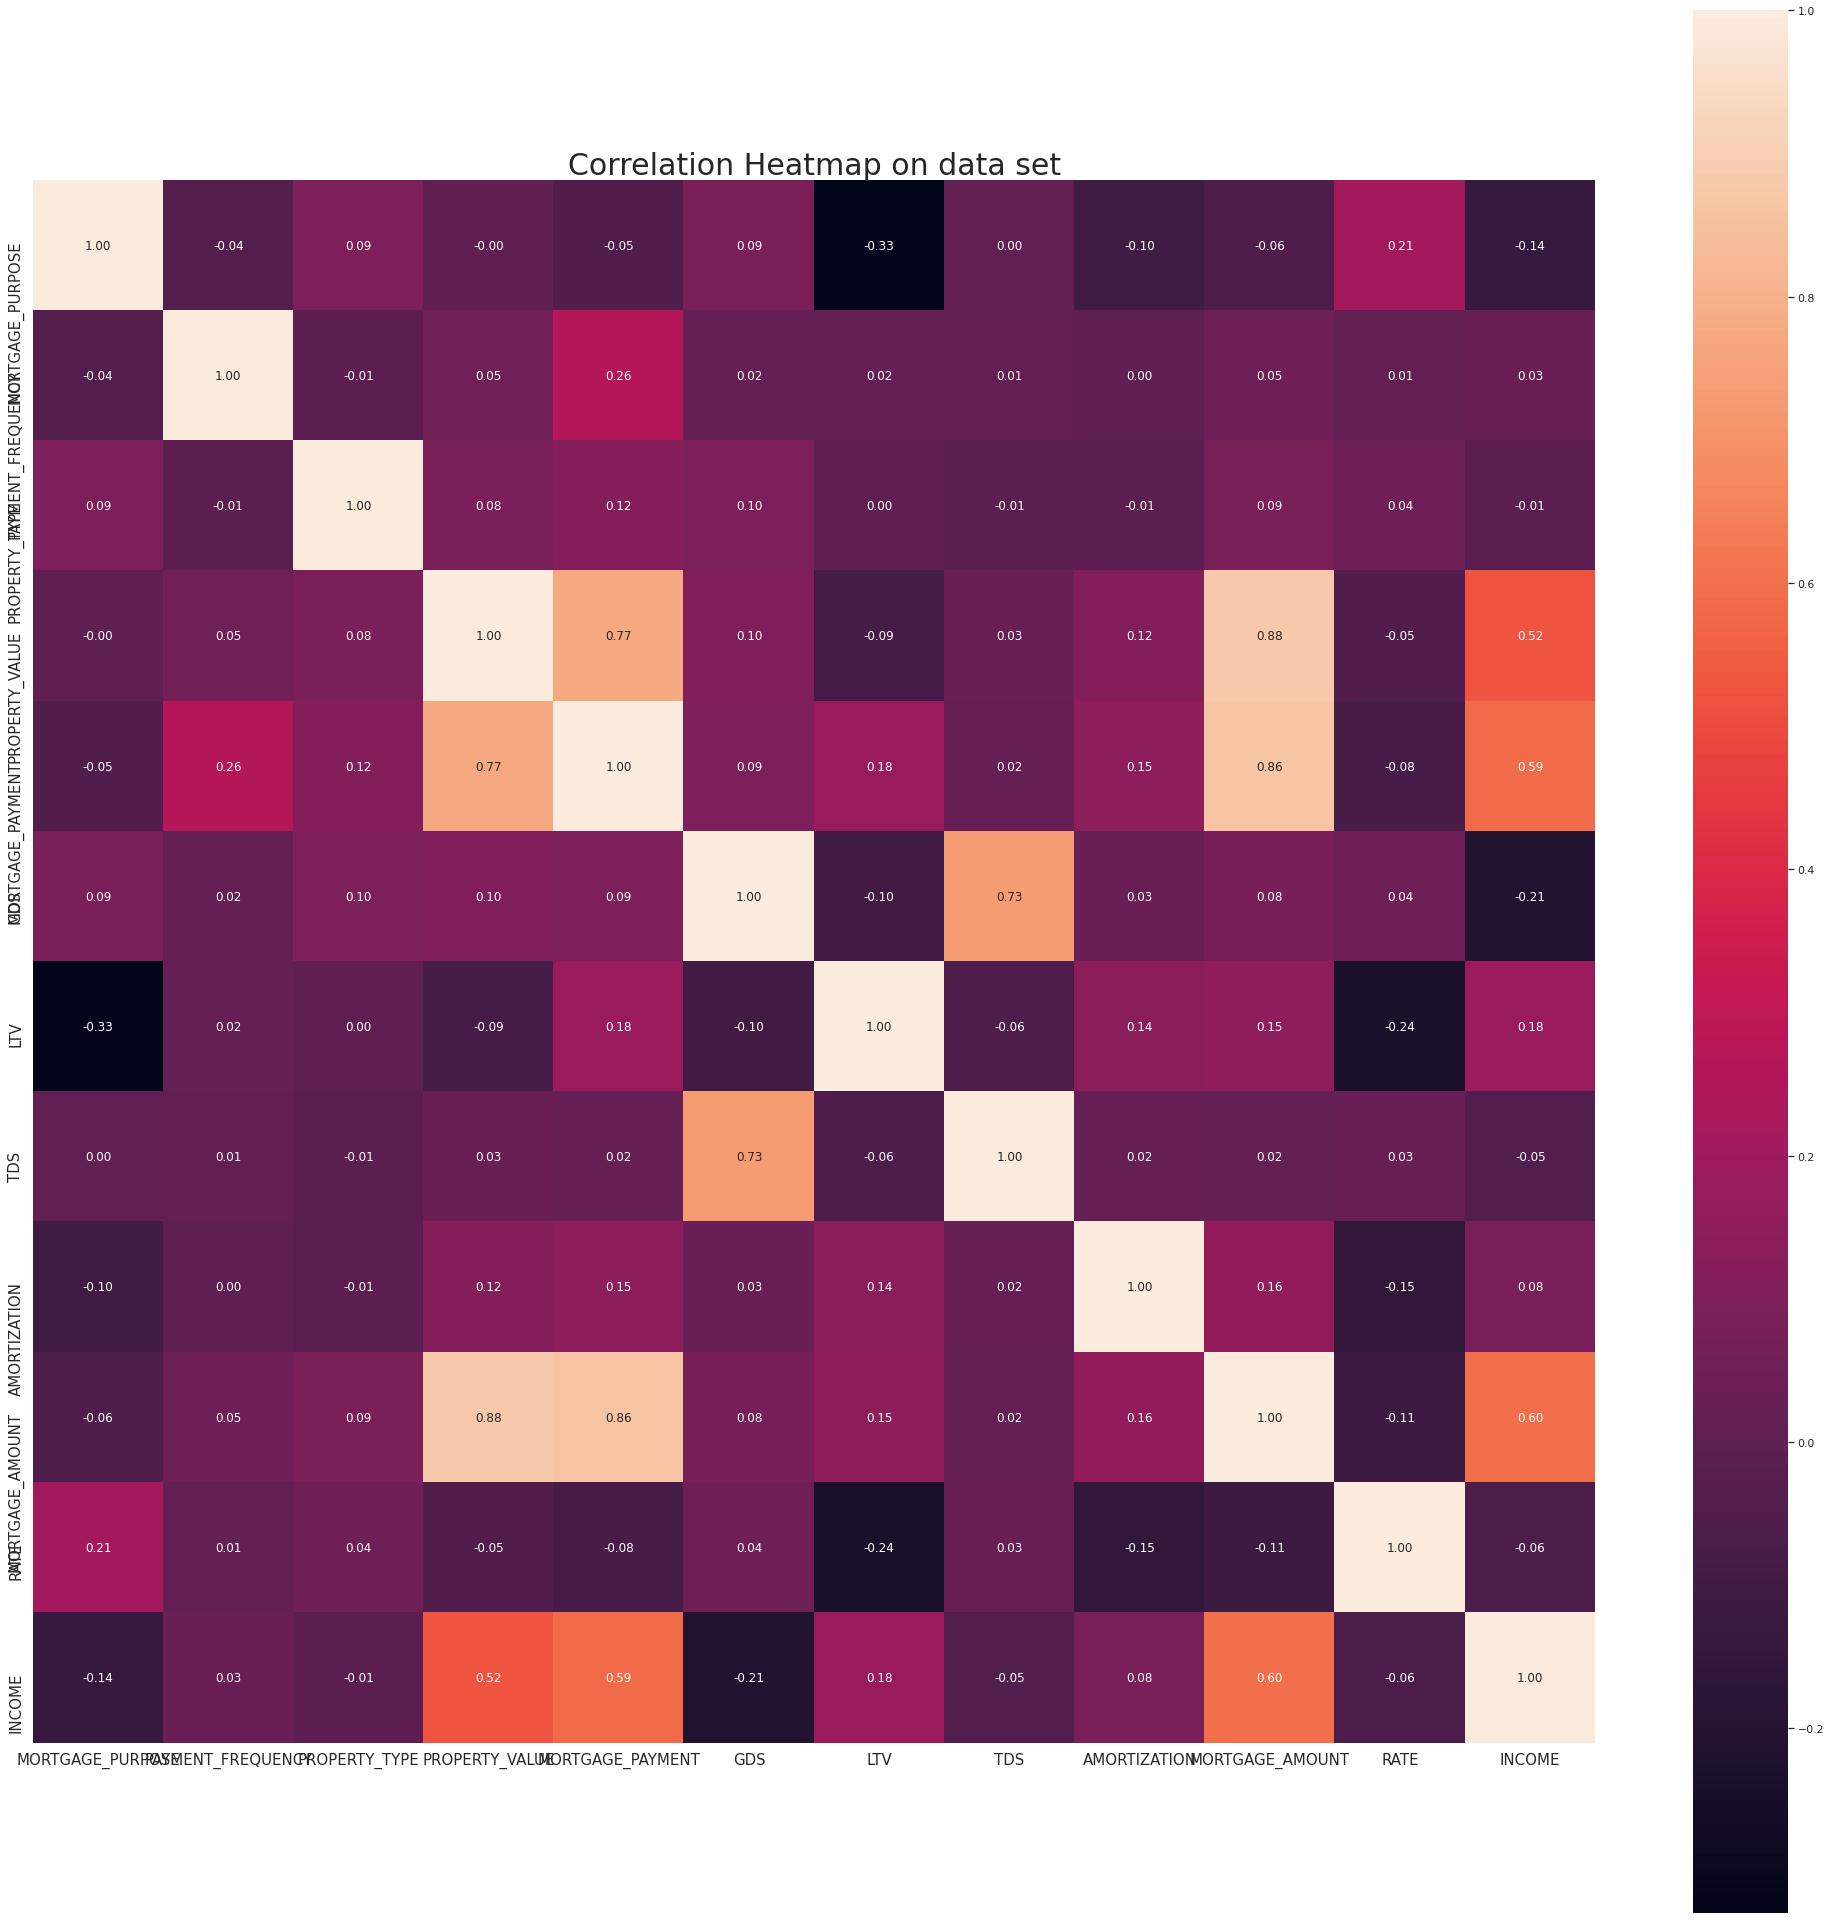

In [52]:
# Correlation heatmap
corr_matrix = X_all.corr()
sns.set( rc = {'figure.figsize': (35, 35)})
plt.figure()
sns.heatmap(corr_matrix, square = True, annot=True, fmt='.2f')
plt.title('Correlation Heatmap on data set',size=30)
plt.yticks(fontsize="15")
plt.xticks(fontsize="15")
plt.show()

In [53]:
# Select correlated features and removed it
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.75)]
to_drop

['MORTGAGE_PAYMENT', 'MORTGAGE_AMOUNT']

In [0]:
# Drop features 
X_all = X_all.drop(X_all[to_drop], axis=1)

In [55]:
# Look at the new data set
X_all.shape

(4564, 10)

In [56]:
X_all.head()

,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,PROPERTY_TYPE,PROPERTY_VALUE,GDS,LTV,TDS,AMORTIZATION,RATE,INCOME
0,1,2,6,148000.0,31.95,65.00,56.78,360.0,4.5,39000.0
1,1,2,3,580000.0,5.37,75.36,37.74,360.0,4.5,176000.0
2,1,2,4,450000.0,28.53,64.35,28.53,360.0,5.0,130000.0
3,0,2,4,850000.0,27.17,80.00,30.00,360.0,5.0,300000.0
4,1,2,4,360000.0,26.60,66.67,26.76,240.0,5.0,93000.0


# Modeling Part

The traditional data exploration is extended looking at the behaviour of several baseline models and which features can be relevant for the prediction. This exploration is splitted in two parts: without handling the imbalanced target variable (scaled baseline models) and handling it (scaled baseline models).  

- Evaluation Metric and Confusion Matrix

The confusion matrix is a summary table representation of prediction results for a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. Good predictions coming from the higher diagonal values of the confusion matrix. For this imbalanced classification task is not used Accuracy metric but more appropriately the F1 score metric that combines both precision and recall, it's an harmonic mean between them, it's indicates how precise is the classifier (precision) and how robust it is (recall). F1 score equal to 0.00 indicates a poor model, instead F1 score equal 1.00 indicates a perfect model.


- Pre-processing

To analyze the performance of a model is a good manner to split the data set into the training set and the test set. It's been decided to split it into three parts: training set, validation set and test set for a better understanding of models. The training set is a sample of data used to fit the model, meanwhile the validation set is a sample of data used to provide an unbiased evaluation of the model that fit on the training set and to tune the model hyperparameters (not in this explorative phase). The test set is a sample of data used to provide an unbiased evaluation of the model applied on data never seen before.

- Standardization

Since values of the features are not uniform and may be neagatively impact the skill of some models, the same models are evaluated with a standardized copy of the data set. It means, data are transformed such that each feature has a mean value of 0 and a standard deviation of 1. 

- Models

The analysis is based on six baseline models: Logistic Regression as the easiest model and as well as benchmark, then other five models: Bagging, Random Forest, AdaBoost, Gradient Boosting Machine and Neural Networks (MLP).

#  Modeling Part I: without handling imbalanced data set

#####- Pre-Processing: split data set

In [0]:
# Break off validation and test set from training data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2,
                                                                random_state=0)

#####- Pre-Processing: standardization

In [0]:
# Standardization of data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.fit_transform(X_valid)
X_test_sc = sc.transform(X_test)

#####- Baseline Models

<Figure size 360x360 with 0 Axes>

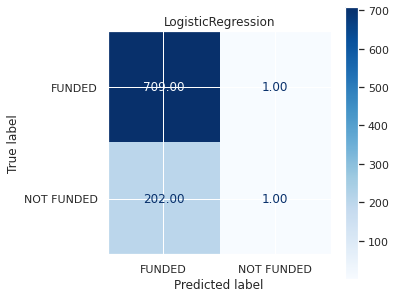

<Figure size 360x360 with 0 Axes>

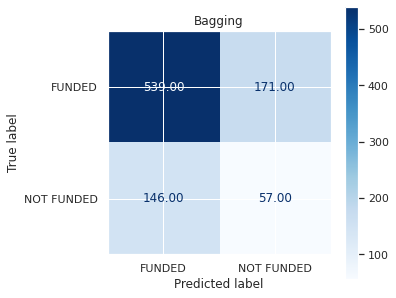

<Figure size 360x360 with 0 Axes>

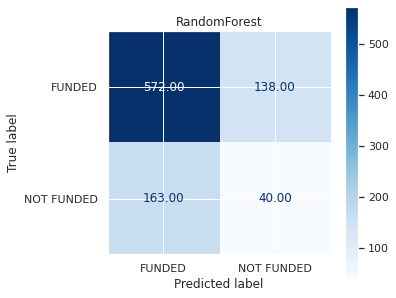

<Figure size 360x360 with 0 Axes>

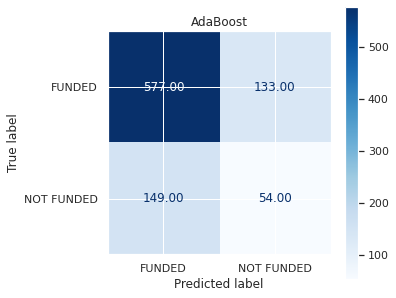

<Figure size 360x360 with 0 Axes>

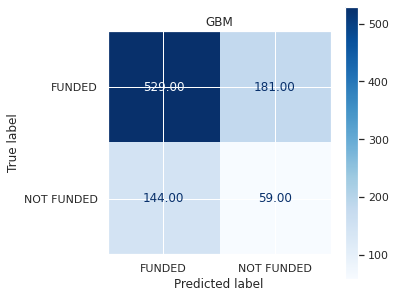

<Figure size 360x360 with 0 Axes>

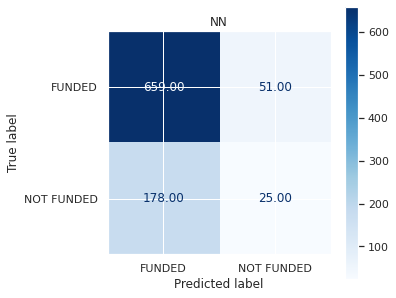

In [59]:
# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('Bagging', BaggingClassifier(random_state=0)))
models.append(('RandomForest', RandomForestClassifier(random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=0)))
models.append(('GBM', GradientBoostingClassifier(random_state=0)))
models.append(('NN', MLPClassifier(random_state=0)))
results_tr = []
results_v = []
results_t = []
names = []
score = []
skf = StratifiedKFold(n_splits=5)
for (name, model) in models:
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train_sc, y_train)
    predictions_tr = my_model.predict(X_train_sc) 
    predictions_v = my_model.predict(X_valid_sc)
    predictions_t = my_model.predict(X_test_sc)
    f1_train = f1_score(y_train, predictions_tr, average='macro') 
    f1_valid = f1_score(y_valid, predictions_v,average='macro') 
    f1_test = f1_score(y_test, predictions_t,average='macro') 
    results_tr.append(f1_train)
    results_v.append(f1_valid)
    results_t.append(f1_test)
    
    names.append(name)
    f_dict = {
        'model': name,
        'f1_train': f1_train,
        'f1_valid': f1_valid,
        'f1_test': f1_test
    }
    score.append(f_dict)
    # Computing Confusion matrix for the above algorithms
    sns.set( rc = {'figure.figsize': (5, 5)})
    plt.figure()
    plot_confusion_matrix(my_model,X_test_sc, y_test,values_format= '.2f', cmap='Blues')
    plt.title(name)
    plt.show()   
score = pd.DataFrame(score, columns = ['model','f1_train', 'f1_valid', 'f1_test'])

In [60]:
# Look at the F1 score for each model and for each data set
print(score)

                model  f1_train  f1_valid   f1_test
0  LogisticRegression  0.440955  0.434230  0.442262
1             Bagging  0.959833  0.524717  0.518631
2        RandomForest  1.000000  0.535727  0.500835
3            AdaBoost  0.511856  0.537840  0.540272
4                 GBM  0.573994  0.539726  0.515685
5                  NN  0.509159  0.544022  0.515592


Spot Check Algorithms


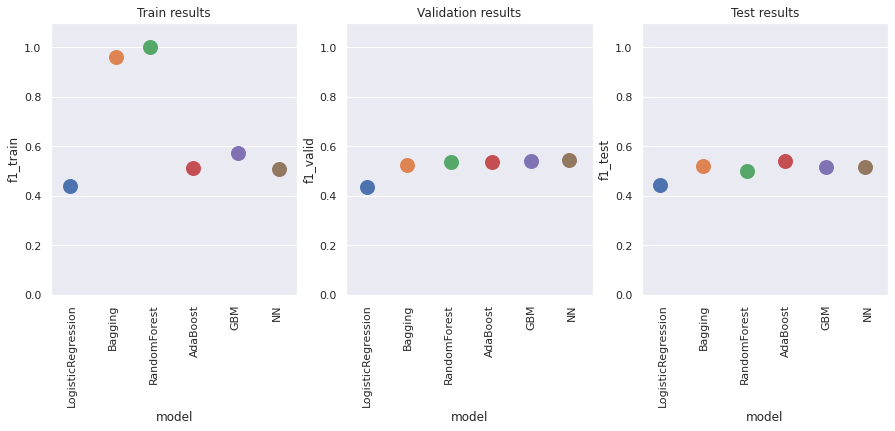

In [61]:
# Plot results for a graphical comparison
print("Spot Check Algorithms")
sns.set( rc = {'figure.figsize': (15, 5)})
plt.figure()
plt.subplot(1,3,1)  
sns.stripplot(x="model", y="f1_train",data=score,size=15)
plt.xticks(rotation=90)
plt.title('Train results')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.subplot(1,3,2)
sns.stripplot(x="model", y="f1_valid",data=score,size=15)
plt.xticks(rotation=90)
plt.title('Validation results')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.subplot(1,3,3)
sns.stripplot(x="model", y="f1_test",data=score,size=15)
plt.xticks(rotation=90)
plt.title('Test results')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.show()